# Loan Eligibility Prediction 

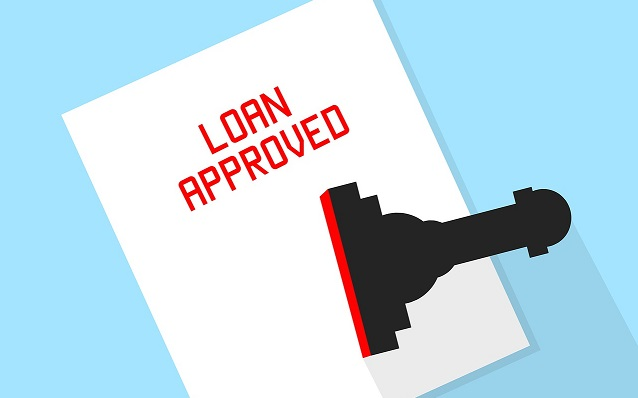Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.

# Importing libraries

In [1]:
#importing Librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading dataset
df1 = pd.read_csv("train_loandata.csv")
df2 = pd.read_csv("test_loandata.csv")

Performing EDA

In [3]:
df1.shape

(614, 13)

In [4]:
df2.shape

(367, 12)

In [5]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Dealing with null values

In [9]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

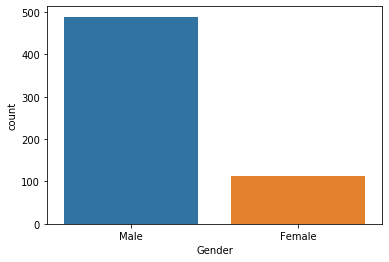

In [10]:
sns.countplot(x = 'Gender',data=df1)


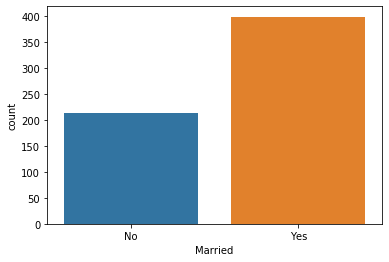

In [11]:
sns.countplot(x = 'Married', data = df1)


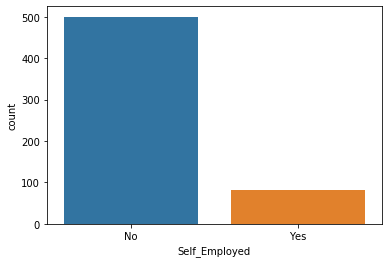

In [12]:
sns.countplot(x = 'Self_Employed', data = df1)


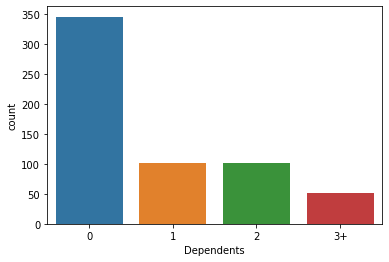

In [13]:
sns.countplot(x = 'Dependents', data = df1)


It can be inferred from the above bar plots that:

80% of applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% of applicants in the dataset are self-employed.

Most of the applicants don't have any dependents.

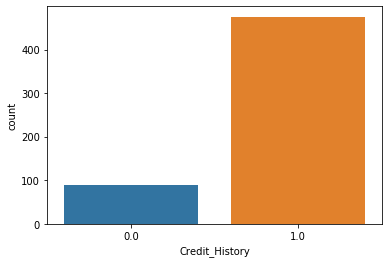

In [14]:
sns.countplot(x = 'Credit_History', data = df1)

It seems people with a credit history as 1 are more likely to get their loans approved.

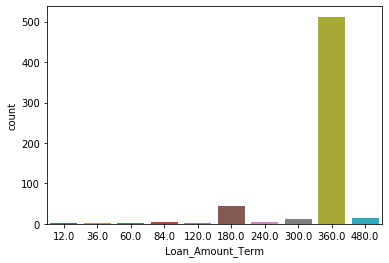

In [15]:
sns.countplot(x = 'Loan_Amount_Term', data = df1)


In [16]:
df1['Gender'] = df1["Gender"].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1["Married"].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1["Dependents"].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1["Self_Employed"].fillna(df1['Self_Employed'].mode()[0])
df1['Credit_History'] = df1["Credit_History"].fillna(df1['Credit_History'].mode()[0])
df1['Loan_Amount_Term'] = df1["Loan_Amount_Term"].fillna(df1['Loan_Amount_Term'].mode()[0])

C:\Users\PRIYANKA\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PRIYANKA\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 5.,  7., 25., 35., 48., 94., 94., 74., 56., 34., 35., 18.,  6.,
         9., 13.,  5.,  5.,  5.,  3.,  2.,  2.,  2.,  2.,  0.,  1.,  0.,
         0.,  4.,  3.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,
         1.]),
 array([  9.   ,  26.275,  43.55 ,  60.825,  78.1  ,  95.375, 112.65 ,
        129.925, 147.2  , 164.475, 181.75 , 199.025, 216.3  , 233.575,
        250.85 , 268.125, 285.4  , 302.675, 319.95 , 337.225, 354.5  ,
        371.775, 389.05 , 406.325, 423.6  , 440.875, 458.15 , 475.425,
        492.7  , 509.975, 527.25 , 544.525, 561.8  , 579.075, 596.35 ,
        613.625, 630.9  , 648.175, 665.45 , 682.725, 700.   ]),
 <a list of 40 Patch objects>)

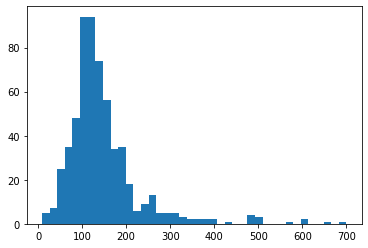

In [17]:
plt.hist(df1['LoanAmount'], bins = 40 )


In [18]:
# Since there are outliers, Median would be best for filling

df1['LoanAmount'] = df1["LoanAmount"].fillna(df1['LoanAmount'].median())


In [19]:
df1.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df1['Loan_Status'].replace('N',0,inplace=True)
df1['Loan_Status'].replace('Y',1,inplace=True)

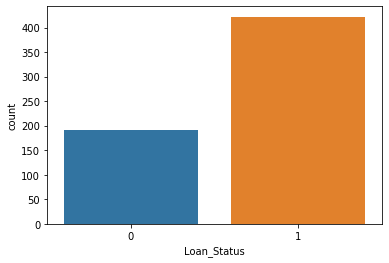

In [21]:
sns.countplot(x = 'Loan_Status', data = df1)


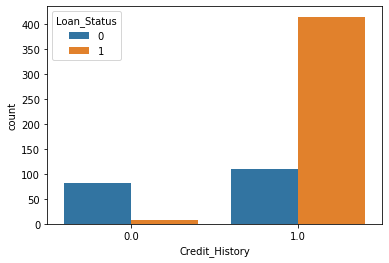

In [22]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df1)


In [23]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Removing useless features

In [24]:
df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']


In [25]:
df1 = df1.drop(columns="Loan_ID", axis=1)


In [26]:
df1 = df1.drop(columns="Dependents", axis=1)
df1 = df1.drop(columns="CoapplicantIncome", axis=1)
df1 = df1.drop(columns="ApplicantIncome", axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder

features = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
encode = LabelEncoder()
for f in features:
    df1[f] = encode.fit_transform(df1[f])

In [28]:
df1

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,71.0,360.0,1.0,0,1,2900.0
610,1,1,0,0,40.0,180.0,1.0,0,1,4106.0
611,1,1,0,0,253.0,360.0,1.0,2,1,8312.0
612,1,1,0,0,187.0,360.0,1.0,2,1,7583.0


In [29]:
x = df1.drop(columns="Loan_Status", axis=1)
y = df1['Loan_Status']

# Training the model

# 1.Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2)


In [31]:
from sklearn.linear_model import LogisticRegression
loreg = LogisticRegression(C = 0.4)

loreg.fit(x_train, y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
from sklearn.model_selection import cross_val_score
print("Train Accuracy: ", loreg.score(x_cv, y_cv) * 100)

Train Accuracy:  80.48780487804879


In [33]:
testdata= pd.read_csv("test_loandata.csv")

x_test = df1.drop(columns="Loan_Status", axis=1)
y_test = df1['Loan_Status']

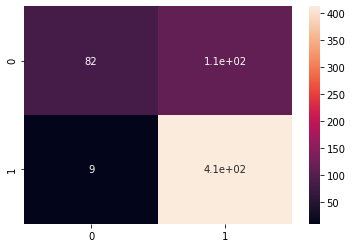

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = loreg.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [34]:
from sklearn.model_selection import cross_val_score
print("Test Accuracy:", loreg.score(x_test, y_test)*100)

Test Accuracy: 80.61889250814332


# 2.Decission Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
#Testing our model
y_pred = classifier.predict(x_test)

In [38]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[173  19]
 [ 15 407]]


94.46254071661238

# Final Accuracy

Logitic Regression gives accuracy of 80.61%

Decision tree Algorithm gives accuracy of 94.46%

We can conclude that Decision tree algorithm works better to build Loan eligibilty predtiction Model